In [2]:
import pandas as pd
import plotly.express as px

file_path = '../data/raw/TMJA2019_with_geopoint_VF_Samir.csv'
df = pd.read_csv(file_path)

print(df.columns)
print(df.head(3))

Index(['objetID', 'route', 'longueur', 'depPrD', 'xD', 'yD', 'zD', 'depPrF',
       'xF', 'yF', 'zF', 'anneeMesureTrafic', 'TMJA', 'geopoint_depart',
       'geopoint_fin', 'TMJA_avg', 'TMJA_actualise', 'count'],
      dtype='object')
   objetID  route  longueur  depPrD         xD          yD  zD  depPrF  \
0  TMJ19_1  A0001    2440.0      93  653006.60  6867037.55   0      93   
1  TMJ19_2  A0001     785.2      93  652895.68  6869486.50   0      93   
2  TMJ19_3  A0001     401.8      93  653192.95  6870100.70   0      93   

          xF          yF  zF  anneeMesureTrafic      TMJA  \
0  652895.68  6869486.50   0               2019  132186.0   
1  653192.95  6870100.70   0               2019  132186.0   
2  653570.77  6870241.67   0               2019  132186.0   

             geopoint_depart               geopoint_fin      TMJA_avg  \
0  POINT(2.358973 48.901624)  POINT(2.357188 48.923638)  94409.742857   
1  POINT(2.357188 48.923638)  POINT(2.361177 48.929182)  94409.742857   
2  P

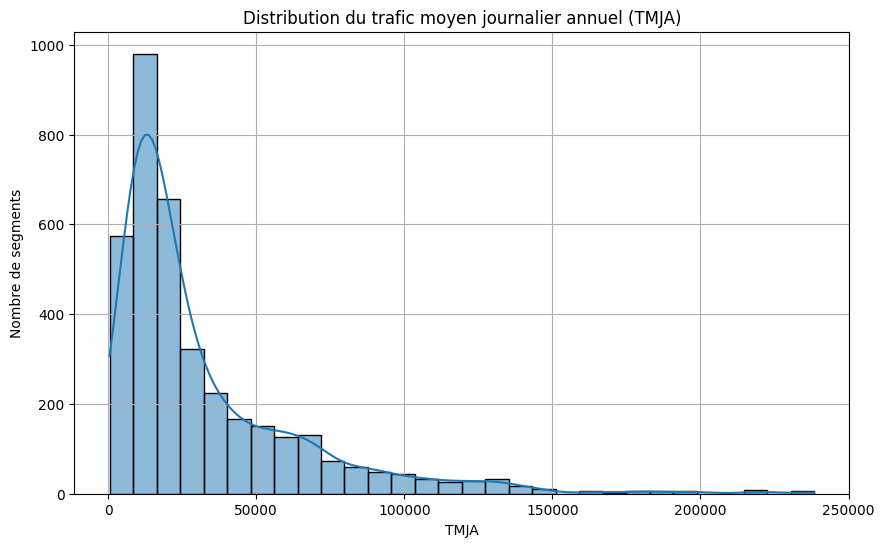

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['TMJA'], bins=30, kde=True)
plt.title("Distribution du trafic moyen journalier annuel (TMJA)")
plt.xlabel("TMJA")
plt.ylabel("Nombre de segments")
plt.grid(True)
plt.show()

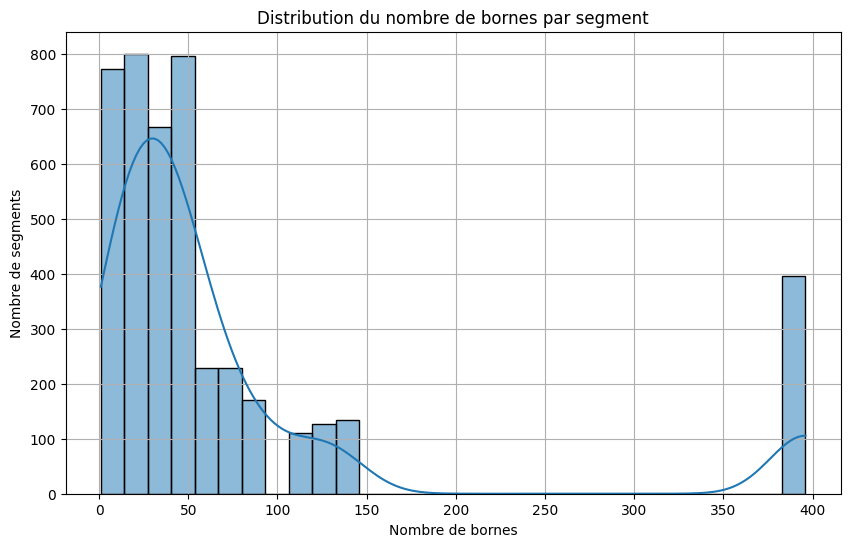

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['count'], bins=30, kde=True)
plt.title("Distribution du nombre de bornes par segment")
plt.xlabel("Nombre de bornes")
plt.ylabel("Nombre de segments")
plt.grid(True)
plt.show()


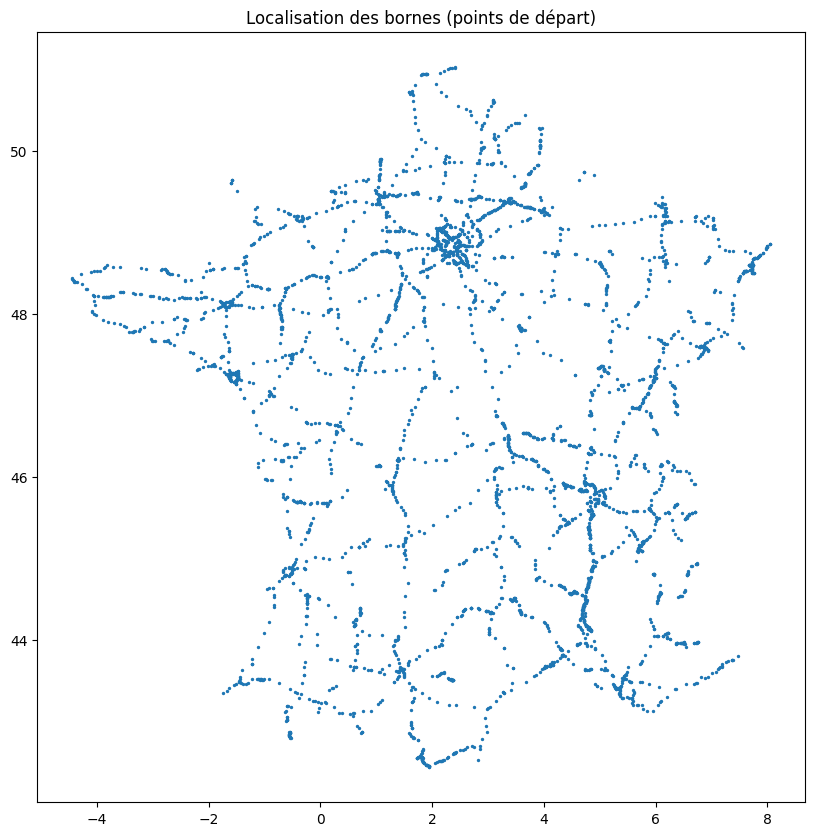

In [7]:
import geopandas as gpd
from shapely import wkt

# Convertir les colonnes de géopoint en géométrie
df['geom_depart'] = df['geopoint_depart'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry='geom_depart', crs="EPSG:4326")

# Affichage de la carte des points de départ
gdf.plot(markersize=2, figsize=(10, 10))
plt.title("Localisation des bornes (points de départ)")
plt.show()


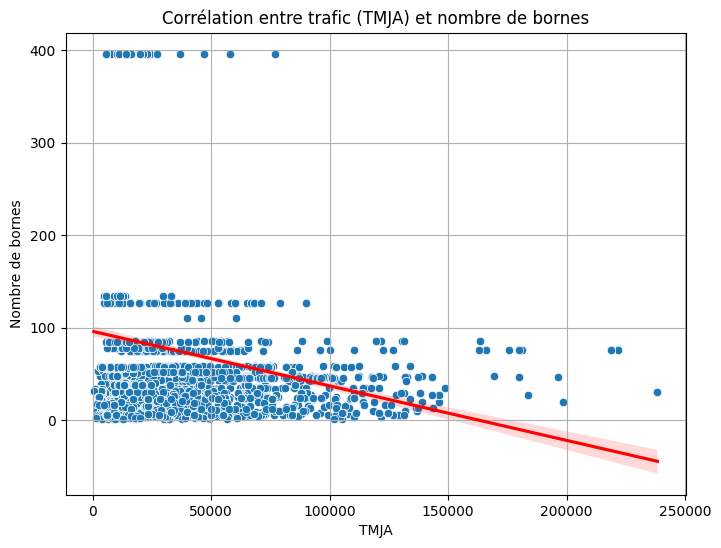

In [8]:
# Corrélation entre TMJA et nombre de bornes par segment
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TMJA', y='count', data=df)
sns.regplot(x='TMJA', y='count', data=df, scatter=False, color='red')
plt.title("Corrélation entre trafic (TMJA) et nombre de bornes")
plt.xlabel("TMJA")
plt.ylabel("Nombre de bornes")
plt.grid(True)
plt.show()
